# Processor temperature

We have a temperature sensor in the processor of our company's server. We want to analyze the data provided to determinate whether we should change the cooling system for a better one. It is expensive and as a data analyst we cannot make decisions without a basis.

We provide the temperatures measured throughout the 24 hours of a day in a list-type data structure composed of 24 integers:
```
temperatures_C = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
```

## Goals

1. Treatment of lists
2. Use of loop or list comprenhention
3. Calculation of the mean, minimum and maximum.
4. Filtering of lists.
5. Interpolate an outlier.
6. Logical operators.
7. Print

## Temperature graph
To facilitate understanding, the temperature graph is shown below. You do not have to do anything in this section. The test starts in **Problem**.

Text(0.5, 1.0, 'Temperatures of our server throughout the day')

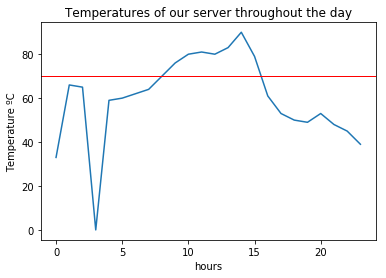

In [36]:
# import
import matplotlib.pyplot as plt
%matplotlib inline

# axis x, axis y
y = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))

# plot
plt.plot(x, y)
plt.axhline(y=70, linewidth=1, color='r')
plt.xlabel('hours')
plt.ylabel('Temperature ºC')
plt.title('Temperatures of our server throughout the day')

## Problem

If the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature above 80ºC or the average exceeds 65ºC throughout the day, we must give the order to change the cooling system to avoid damaging the processor.

We will guide you step by step so you can make the decision by calculating some intermediate steps:

1. Minimum temperature
2. Maximum temperature
3. Temperatures equal to or greater than 70ºC
4. Average temperatures throughout the day.
5. If there was a sensor failure at 03:00 and we did not capture the data, how would you estimate the value that we lack? Correct that value in the list of temperatures.
6. Bonus: Our maintenance staff is from the United States and does not understand the international metric system. Pass temperatures to Degrees Fahrenheit.

Formula: F = 1.8 * C + 32

web: https://en.wikipedia.org/wiki/Conversion_of_units_of_temperature


33
90
[76, 80, 81, 80, 83, 90, 79]
The average value is: 62.833333333333336
62.833333333333336
[33, 66, 65, 62.0, 59, 60, 62, 64, 70, 76, 80, 81, 80, 83, 90, 79, 61, 53, 50, 49, 53, 48, 45, 39]
[33, 66, 65, 62.0, 59, 60, 62, 64, 70, 76, 80, 81, 80, 83, 90, 79, 61, 53, 50, 49, 53, 48, 45, 39]
[91.4, 150.8, 149.0, 143.60000000000002, 138.2, 140.0, 143.60000000000002, 147.2, 158.0, 168.8, 176.0, 177.8, 176.0, 181.4, 194.0, 174.20000000000002, 141.8, 127.4, 122.0, 120.2, 127.4, 118.4, 113.0, 102.2]


Text(0.5, 1.0, 'Temperatures of our server throughout the day')

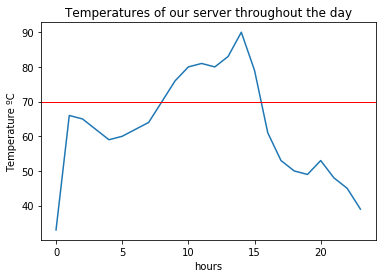

In [38]:
# assign a variable to the list of temperatures
tmp_24 = y

# 1. Calculate the minimum of the list and print the value using print()
min_tmp = min(tmp_24)
print(min_tmp)
# 2. Calculate the maximum of the list and print the value using print()
max_tmp = max(tmp_24)
print(max_tmp)

# 3. Items in the list that are greater than 70ºC and print the result
greater_70 =[]

for i in tmp_24: 
    if i > 70 : 
        greater_70.append(i)
print(greater_70)


# 4. Calculate the mean temperature throughout the day and print the result
def meanfunction (list_num):
    mean = sum(list_num)/len(list_num)
    print ("The average value is:", mean)
    return mean 

print(meanfunction(tmp_24))

# 5.1 Solve the fault in the sensor by estimating a value
#If there was a sensor failure at 03:00 and we did not capture the data, how would you estimate the value 
#that we lack? Correct that value in the list of temperatures.


#I would do it by calculating the linear regression between the t-1 and t+1 time periods.
predicted_value = (tmp_24[2]+tmp_24[4])/2
lack_hour = 3


# 5.2 Update of the estimated value at 03:00 on the list
tmp_24[lack_hour] = predicted_value

print(tmp_24)




# Bonus: convert the list of ºC to ºFarenheit
Far_tmp_24 = []

for i in tmp_24: 
    Far_tmp_i = 1.8*i + 32
    Far_tmp_24.append(Far_tmp_i)
    
print(tmp_24)
print(Far_tmp_24)

plt.plot(x, tmp_24)
plt.axhline(y=70, linewidth=1, color='r')
plt.xlabel('hours')
plt.ylabel('Temperature ºC')
plt.title('Temperatures of our server throughout the day')


## Take the decision
Remember that if the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature higher than 80ºC or the average was higher than 65ºC throughout the day, we must give the order to change the cooling system to avoid the danger of damaging the equipment:
* more than 4 hours with temperatures greater than or equal to 70ºC
* some temperature higher than 80ºC
* average was higher than 65ºC throughout the day
If any of these three is met, the cooling system must be changed.


In [39]:
# Print True or False depending on whether you would change the cooling system or not
tmp_great70 = 0 

#more than 4 hours with tmp greater than 70 or equal to 70ºC 
for i in tmp_24: 
    if i >= 70: 
        tmp_great70 +=1

result = any(tmp_24[x] >80 for x in range(len(tmp_24)))

if tmp_great70 >=4: 
    print(True)
elif meanfunction(tmp_24) >= 65:
    print(True)
elif(result): #some tmp greater than 80. 
    print(True)

True


## Future improvements
1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?
3. Average of each of the lists (ºC and ºF). How they relate?
4. Standard deviation of each of the lists. How they relate?


In [55]:
# 1. We want the hours (not the temperatures) whose temperature exceeds 70ºC

hours_tmp_great70 = [i for i, v in enumerate(tmp_24) if v >=70]
print("The hours where the T is greater than 70 are:", hours_tmp_great70)

The hours where the T is greater than 70 are: [8, 9, 10, 11, 12, 13, 14, 15]


In [83]:
# 2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?

consec_timeperiods = 0

for i in range(len(hours_tmp_great70)-1):
    if (hours_tmp_great70[i+1] - hours_tmp_great70[i] == 1):
        consec_timeperiods +=1
    else: 
        consec_timeperiods = 0 
    if  consec_timeperiods > 4: 
        print("The condition of more than 4 consecutive time periods with T<= 70 ºC is met.")
        break    
    

The condition of more than 4 consecutive time periods with T<= 70 ºC is met.


In [85]:
# 3. Average of each of the lists (ºC and ºF). How they relate?
mean_tmp24 = meanfunction(tmp_24)
mean_fartmp24 = meanfunction(Far_tmp_24)

mean_rel = mean_fartmp24 / mean_tmp24

print("The mean in ºC and the mean in Fahrenheit are related by the relationship to convert 1 degree Celsius to Fahrenheit,\
      which is the following one: 1.8*C+32")

The average value is: 62.833333333333336
The average value is: 145.1
The mean in ºC and the mean in Fahrenheit are related by the relationship to convert 1 degree Celsius to Fahrenheit,      which is the following one: 1.8*C+32


In [88]:
# 4. Standard deviation of each of the lists. How they relate?

def standard_deviation(list_num, mean_value):
   
    values_list = []
    
    for i in list_num: 
        value = (i-mean_value)**2
        values_list.append(value)
   
    num = sum(values_list)

    den = len(values_list) - 1

    std_dev = (num/den)**0.5

    print('The standard deviation is:', std_dev)

    return std_dev

std_dev_tmp24 = standard_deviation(tmp_24, mean_tmp24)
std_dev_far = standard_deviation(Far_tmp_24, mean_fartmp24)

std_dev_rel = std_dev_far/std_dev_tmp24

print("Relation:", std_dev_rel)

print("In this case the relationship is not the formula to convert from Celsius to Fahrenheit. Here, the relationship is the \
the slope of the line that represents the relationship between Celsius and Fahrenheit, being this value 1.8")

The standard deviation is: 14.94821980579356
The standard deviation is: 26.906795650428407
Relation: 1.8
In this case the relationship is not the formula to convert from Celsius to Fahrenheit. Here, the relationship is the the slope of the line that represents the relationship between Celsius and Fahrenheit, being this value 1.8
